In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/data_and_models

/content/gdrive/MyDrive/data_and_models


In [4]:
import functools
import os
from os import listdir
import json
import pandas as pd
import keras

In [8]:
def evaluate(name_model, speciphic_name , data):
  metadata =  f"{data}/data/{name_model}/metainfo.json"
  data_path = f"{data}/data/{name_model}/{speciphic_name}"
  model_path_ = f"{data}/models/{name_model}/{speciphic_name}"
  model_path = f"{model_path_}/{os.listdir(model_path_)[0]}"
  with open(metadata, "r") as read_file:
    js_file = json.load(read_file)
  inp = js_file[speciphic_name]["n_samples"]
  inp_shape = js_file[speciphic_name]["input_dim"]
  output_dim = js_file[speciphic_name]["output_dim"]
  inp_shape_flatten = functools.reduce(lambda a, b: a*b, inp_shape)

  print("getting data")
  df_train = pd.read_csv (data_path + '/train.csv').to_numpy()
  df_test = pd.read_csv (data_path + '/inference.csv').to_numpy()

  X_train = df_train[:,:inp_shape_flatten].reshape(-1,*inp_shape)
  y_train = df_train[:,inp_shape_flatten:].reshape(-1,*output_dim)

  X_test = df_test[:,:inp_shape_flatten].reshape(-1,*inp_shape)
  y_test = df_test[:,inp_shape_flatten:].reshape(-1,*output_dim)
  print("loading model")
  model = keras.models.load_model(model_path)
  #print(model.summary())
  print("evaluuation on train data set on 100 batch size")
  t = model.evaluate(X_train,y_train,batch_size=100)
  print("evaluuation on inference data set on 100 batch size")
  i = model.evaluate(X_test,y_test,batch_size=100)
  return [t,i]

In [9]:
datas={}
path = "/content/gdrive/MyDrive/data_and_models/data"
for p in os.listdir(path):
  sub_dir_p = list(filter(os.path.isdir,[path +"/"+ p +"/"+ pa for pa in os.listdir(path+"/"+p)]))
  datas[p] = list(map(lambda x : x.split("/")[-1],sub_dir_p))

In [11]:
plot_info = []
dictionary = {}
for key, value in datas.items():
  dictionary[key]=[]
  if key == "channel_decoding": continue
  for v in value:
    print(f"\n\n\t\t\t {key}     {v}")
    t,i = evaluate(key,v,"/content/gdrive/MyDrive/data_and_models")
    dictionary[key].append([v,t,i])




			 beam_selection     input=beam_subset
getting data
loading model
evaluuation on train data set on 100 batch size
762/762 [==============================] - 3s 4ms/step - loss: 0.1370 - categorical_accuracy: 0.9490 - top_k_categorical_accuracy: 0.9987
evaluuation on inference data set on 100 batch size
327/327 [==============================] - 1s 4ms/step - loss: 0.1926 - categorical_accuracy: 0.9281 - top_k_categorical_accuracy: 0.9976


			 beam_selection     input=sub-6GHz_channels
getting data
loading model
evaluuation on train data set on 100 batch size
762/762 [==============================] - 3s 4ms/step - loss: 0.5988 - categorical_accuracy: 0.8005 - top_k_categorical_accuracy: 0.9767
evaluuation on inference data set on 100 batch size
327/327 [==============================] - 1s 4ms/step - loss: 0.6506 - categorical_accuracy: 0.7675 - top_k_categorical_accuracy: 0.9731


			 channel_estimation     frequency=2.5
getting data
loading model
evaluuation on train data set on

In [14]:
for key,value in dictionary.items():
  print(key,value) 

beam_selection [['input=beam_subset', [0.13699521124362946, 0.9490058422088623, 0.9986736178398132], [0.19257040321826935, 0.9281402230262756, 0.9975791573524475]], ['input=sub-6GHz_channels', [0.5988213419914246, 0.8005279302597046, 0.9767289161682129], [0.6505782604217529, 0.7675052881240845, 0.9731253385543823]]]
channel_estimation [['frequency=2.5', [1.8487536834754792e-08, 1.8487536834754792e-08], [1.849814168508601e-08, 1.849814168508601e-08]]]
power_allocation [['algorithm=wmmse', [0.04347563907504082, 0.04347563907504082], [0.04510805010795593, 0.04510805010795593]]]
modulation_recognition [['snr_min=0', [0.26230689883232117, 0.889427125453949], [0.3606916069984436, 0.8472681045532227]], ['snr_min=-Infinity', [1.213132619857788, 0.5810816884040833], [1.3365986347198486, 0.5160532593727112]]]
jamming_detection [['dataset=uav_jamming', [5.781598463872051e-11, 1.0], [0.002173956483602524, 0.9998584985733032]]]
channel_decoding []


## channel decoding model seems to have trouble to load metrics  

In [63]:
model_path = "/content/gdrive/MyDrive/data_and_models/models/channel_decoding/coding_scheme=convolutional/a6c2c4e6-d13e-37c6-a5a6-f625e69bfc82"
model = keras.models.load_model(model_path)

ValueError: ignored

so i just tried to check the accuracy by defining metric after loading model 

I used bit error rate that was defined in utils 

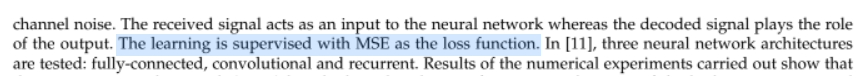

In [17]:
from tensorflow.keras.metrics import MeanMetricWrapper
from tensorflow import cast, abs, not_equal, round
def bit_error_rate(y_true, y_pred):
    return abs(cast(not_equal(y_true, round(y_pred)), dtype='float32'))

In [21]:
def evaluate1(name_model, speciphic_name , data):
  metadata =  f"{data}/data/{name_model}/metainfo.json"
  data_path = f"{data}/data/{name_model}/{speciphic_name}"
  model_path_ = f"{data}/models/{name_model}/{speciphic_name}"
  model_path = f"{model_path_}/{os.listdir(model_path_)[0]}"
  with open(metadata, "r") as read_file:
    js_file = json.load(read_file)
  inp = js_file[speciphic_name]["n_samples"]
  inp_shape = js_file[speciphic_name]["input_dim"]
  output_dim = js_file[speciphic_name]["output_dim"]
  inp_shape_flatten = functools.reduce(lambda a, b: a*b, inp_shape)

  print("getting data")
  df_train = pd.read_csv (data_path + '/train.csv').to_numpy()
  df_test = pd.read_csv (data_path + '/inference.csv').to_numpy()

  X_train = df_train[:,:inp_shape_flatten].reshape(-1,*inp_shape)
  y_train = df_train[:,inp_shape_flatten:].reshape(-1,*output_dim)

  X_test = df_test[:,:inp_shape_flatten].reshape(-1,*inp_shape)
  y_test = df_test[:,inp_shape_flatten:].reshape(-1,*output_dim)
  print("loading model")
  model = keras.models.load_model(model_path,compile =False )
  model.compile(loss='mse',metrics=bit_error_rate)
  #print(model.summary())
  print("evaluuation on train data set on 100 batch size")
  t = model.evaluate(X_train,y_train,batch_size=100)
  print("evaluuation on inference data set on 100 batch size")
  i = model.evaluate(X_test,y_test,batch_size=100)
  return [t,i]

In [22]:
for key, value in datas.items():
  if key == "channel_decoding": 
      for v in value:
        print(f"\n\n\t\t\t {key}     {v}")
        evaluate1(key,v,"/content/gdrive/MyDrive/data_and_models")



			 channel_decoding     coding_scheme=convolutional
getting data
loading model
evaluuation on train data set on 100 batch size
6300/6300 [==============================] - 43s 7ms/step - loss: 0.0299 - bit_error_rate: 0.0416
evaluuation on inference data set on 100 batch size
2700/2700 [==============================] - 18s 7ms/step - loss: 0.0312 - bit_error_rate: 0.0434


			 channel_decoding     coding_scheme=polar
getting data
loading model
evaluuation on train data set on 100 batch size
8400/8400 [==============================] - 36s 4ms/step - loss: 0.0546 - bit_error_rate: 0.0973
evaluuation on inference data set on 100 batch size
3600/3600 [==============================] - 15s 4ms/step - loss: 0.0588 - bit_error_rate: 0.1030


			 channel_decoding     coding_scheme=ldpc
getting data
loading model
evaluuation on train data set on 100 batch size
6300/6300 [==============================] - 43s 7ms/step - loss: 0.0569 - bit_error_rate: 0.0786
evaluuation on inference data set